<a href="https://colab.research.google.com/github/ArdanEslik/AKU-RLI-Data/blob/main/notebooks/train-yolov8-object-detection-on-custom-dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Fri Dec 20 10:45:40 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

**Aşağıdaki alandaki kod bloğu kullanılmak istenen veri setine göre değişecek. https://universe.roboflow.com/' da seçilen dataset için download dataset'e basılarak yolov8 seçilecek ve show download code denilecek. Çıkan kod aşağıdaki ilgili alana kopyalanacak değiştirilecek. **



In [5]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow==1.1.48 --quiet

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Igh6llT273zCj6FMMsqB")
project = rf.workspace("data-science-w0gxs").project("egg-segmentation-in-poultry-industry-based-on-color-4kum1")
version = project.version(2)
dataset = version.download("yolov8")


/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.5 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to -Egg-Segmentation-in-Poultry-Industry-Based-on-Color-2 in yolov8:: 100%|██████████| 35082/35082 [00:08<00:00, 4334.60it/s]


## Custom Training

In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=2 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 329MB/s]
New https://pypi.org/project/ultralytics/8.3.51 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/-Egg-Segmentation-in-Poultry-Industry-Based-on-Color-2/data.yaml, epochs=2, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=Fa

In [7]:
!ls {HOME}/runs/detect/train

args.yaml					    PR_curve.png	   val_batch0_pred.jpg
confusion_matrix_normalized.png			    R_curve.png		   val_batch1_labels.jpg
confusion_matrix.png				    results.csv		   val_batch1_pred.jpg
events.out.tfevents.1734691729.8d43ff76e5ad.1430.0  results.png		   val_batch2_labels.jpg
F1_curve.png					    train_batch0.jpg	   val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch1.jpg	   weights
labels.jpg					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


/content


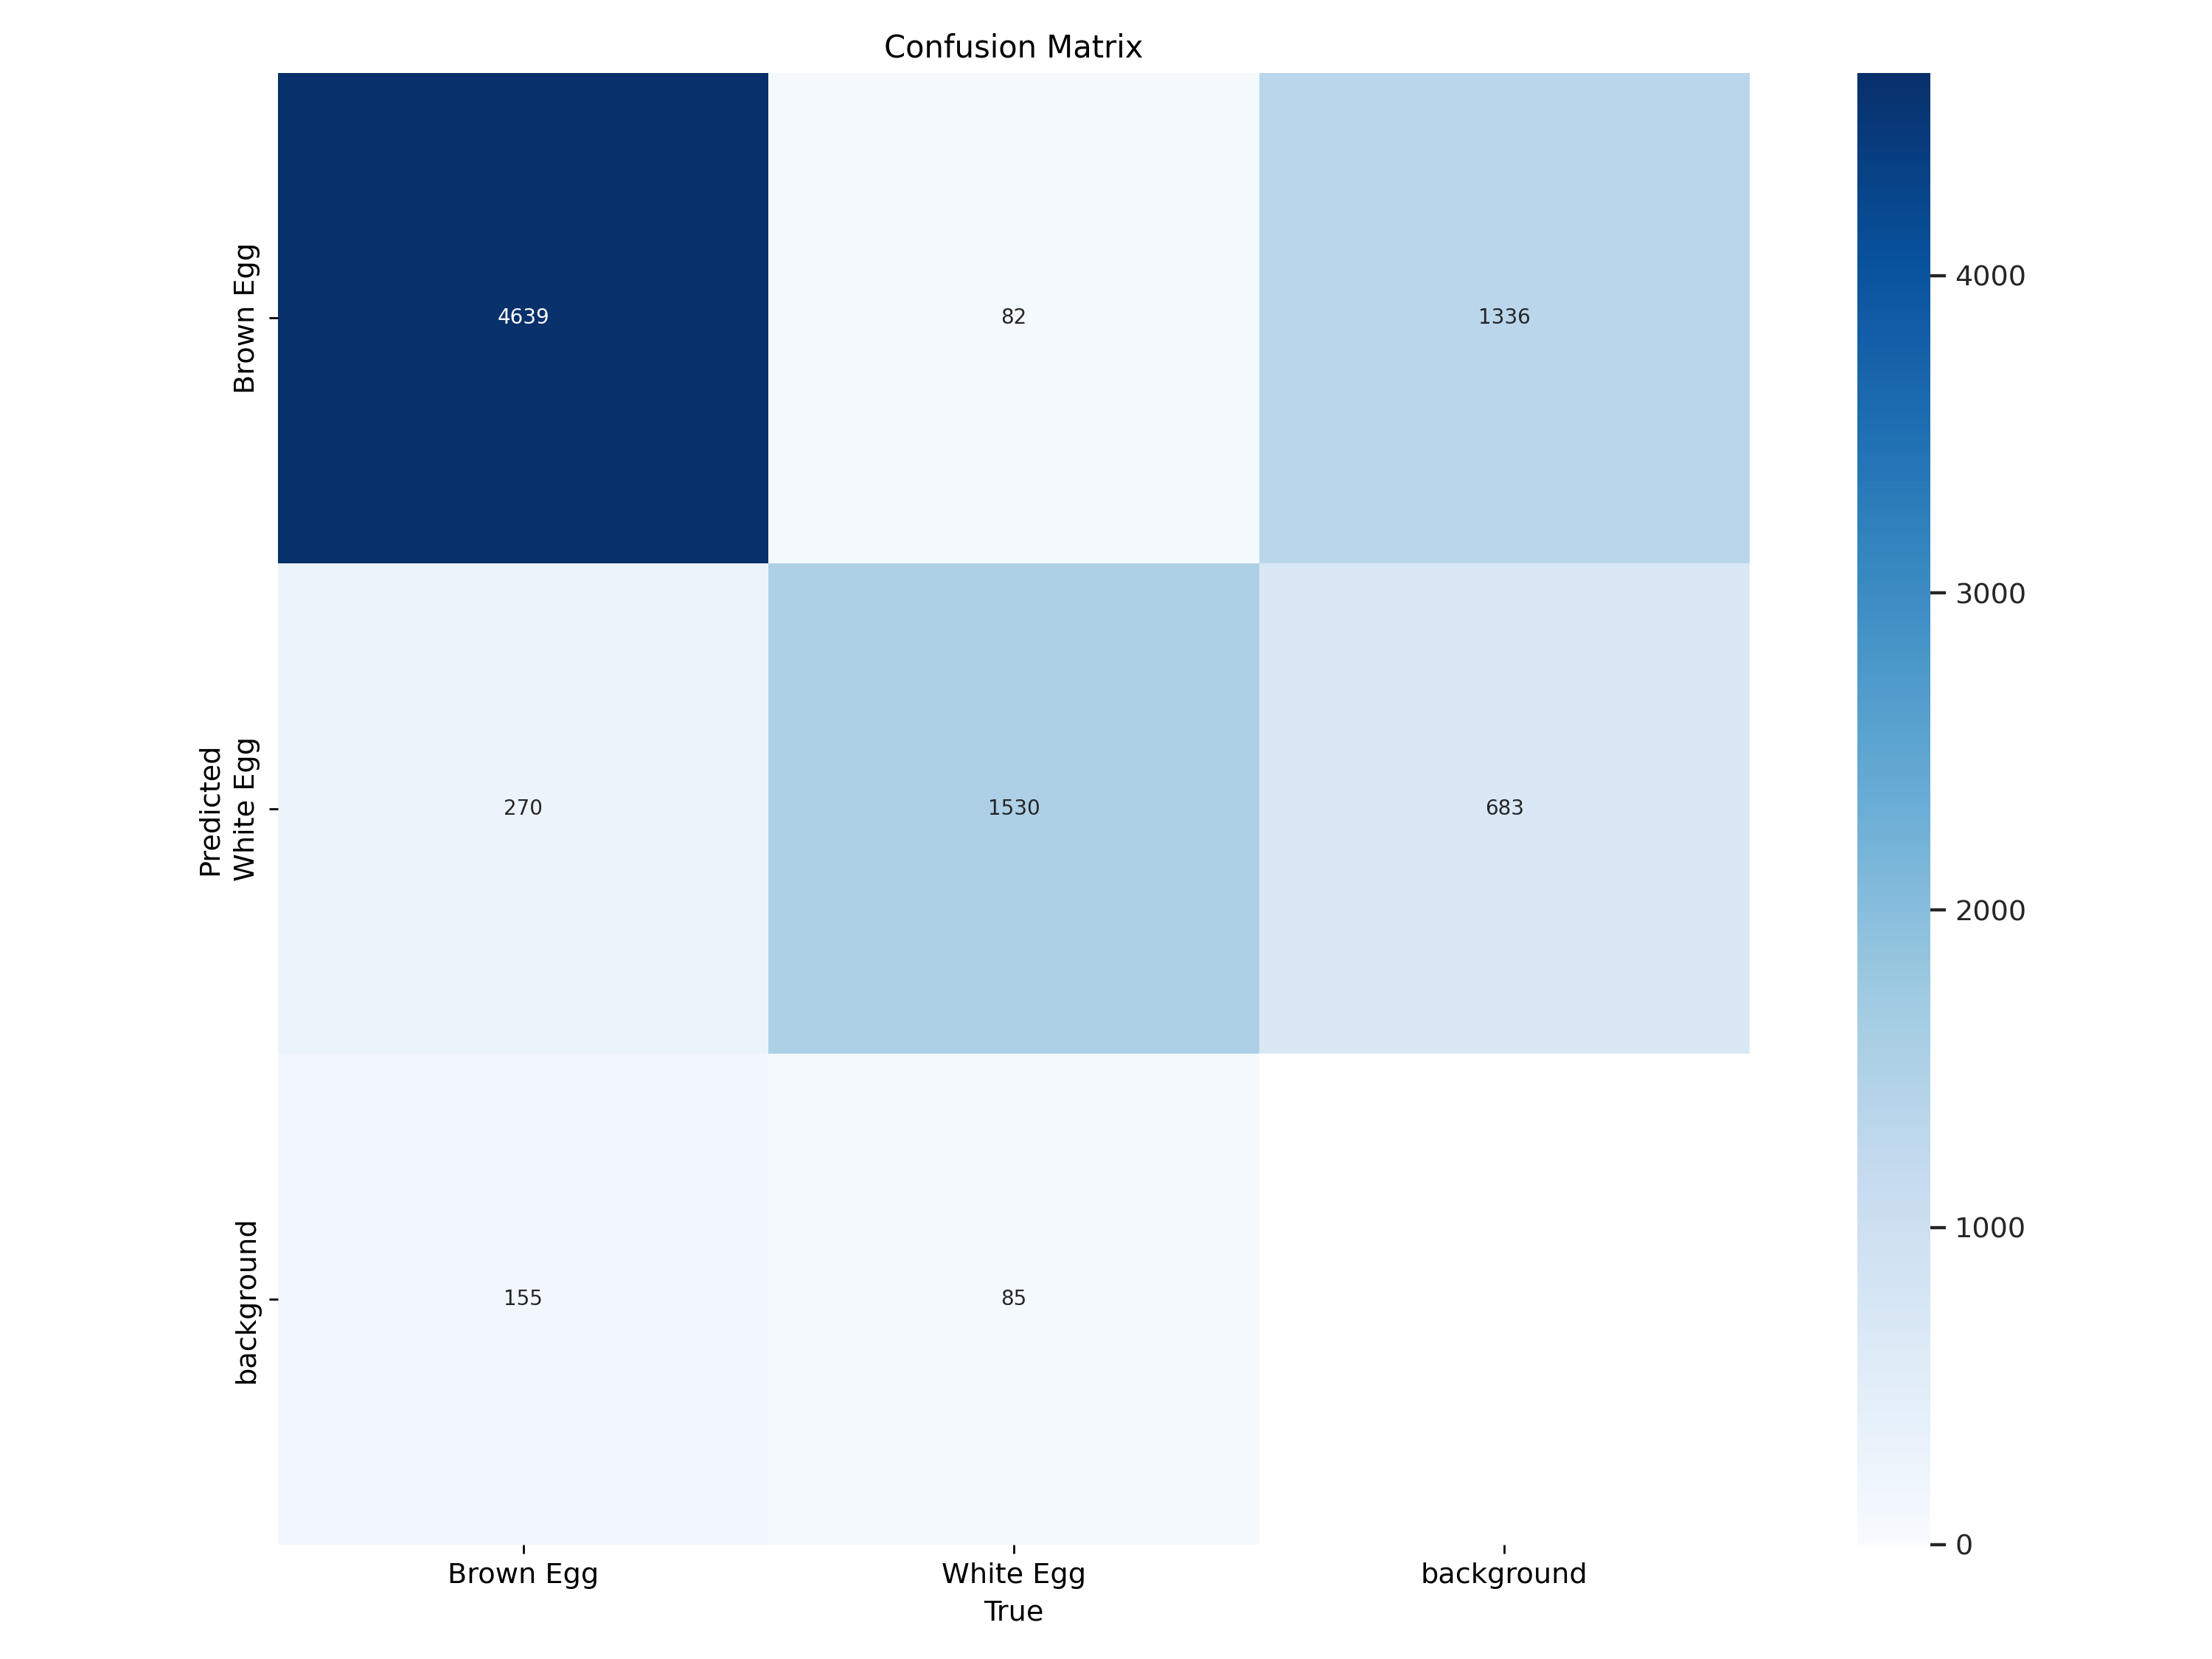

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


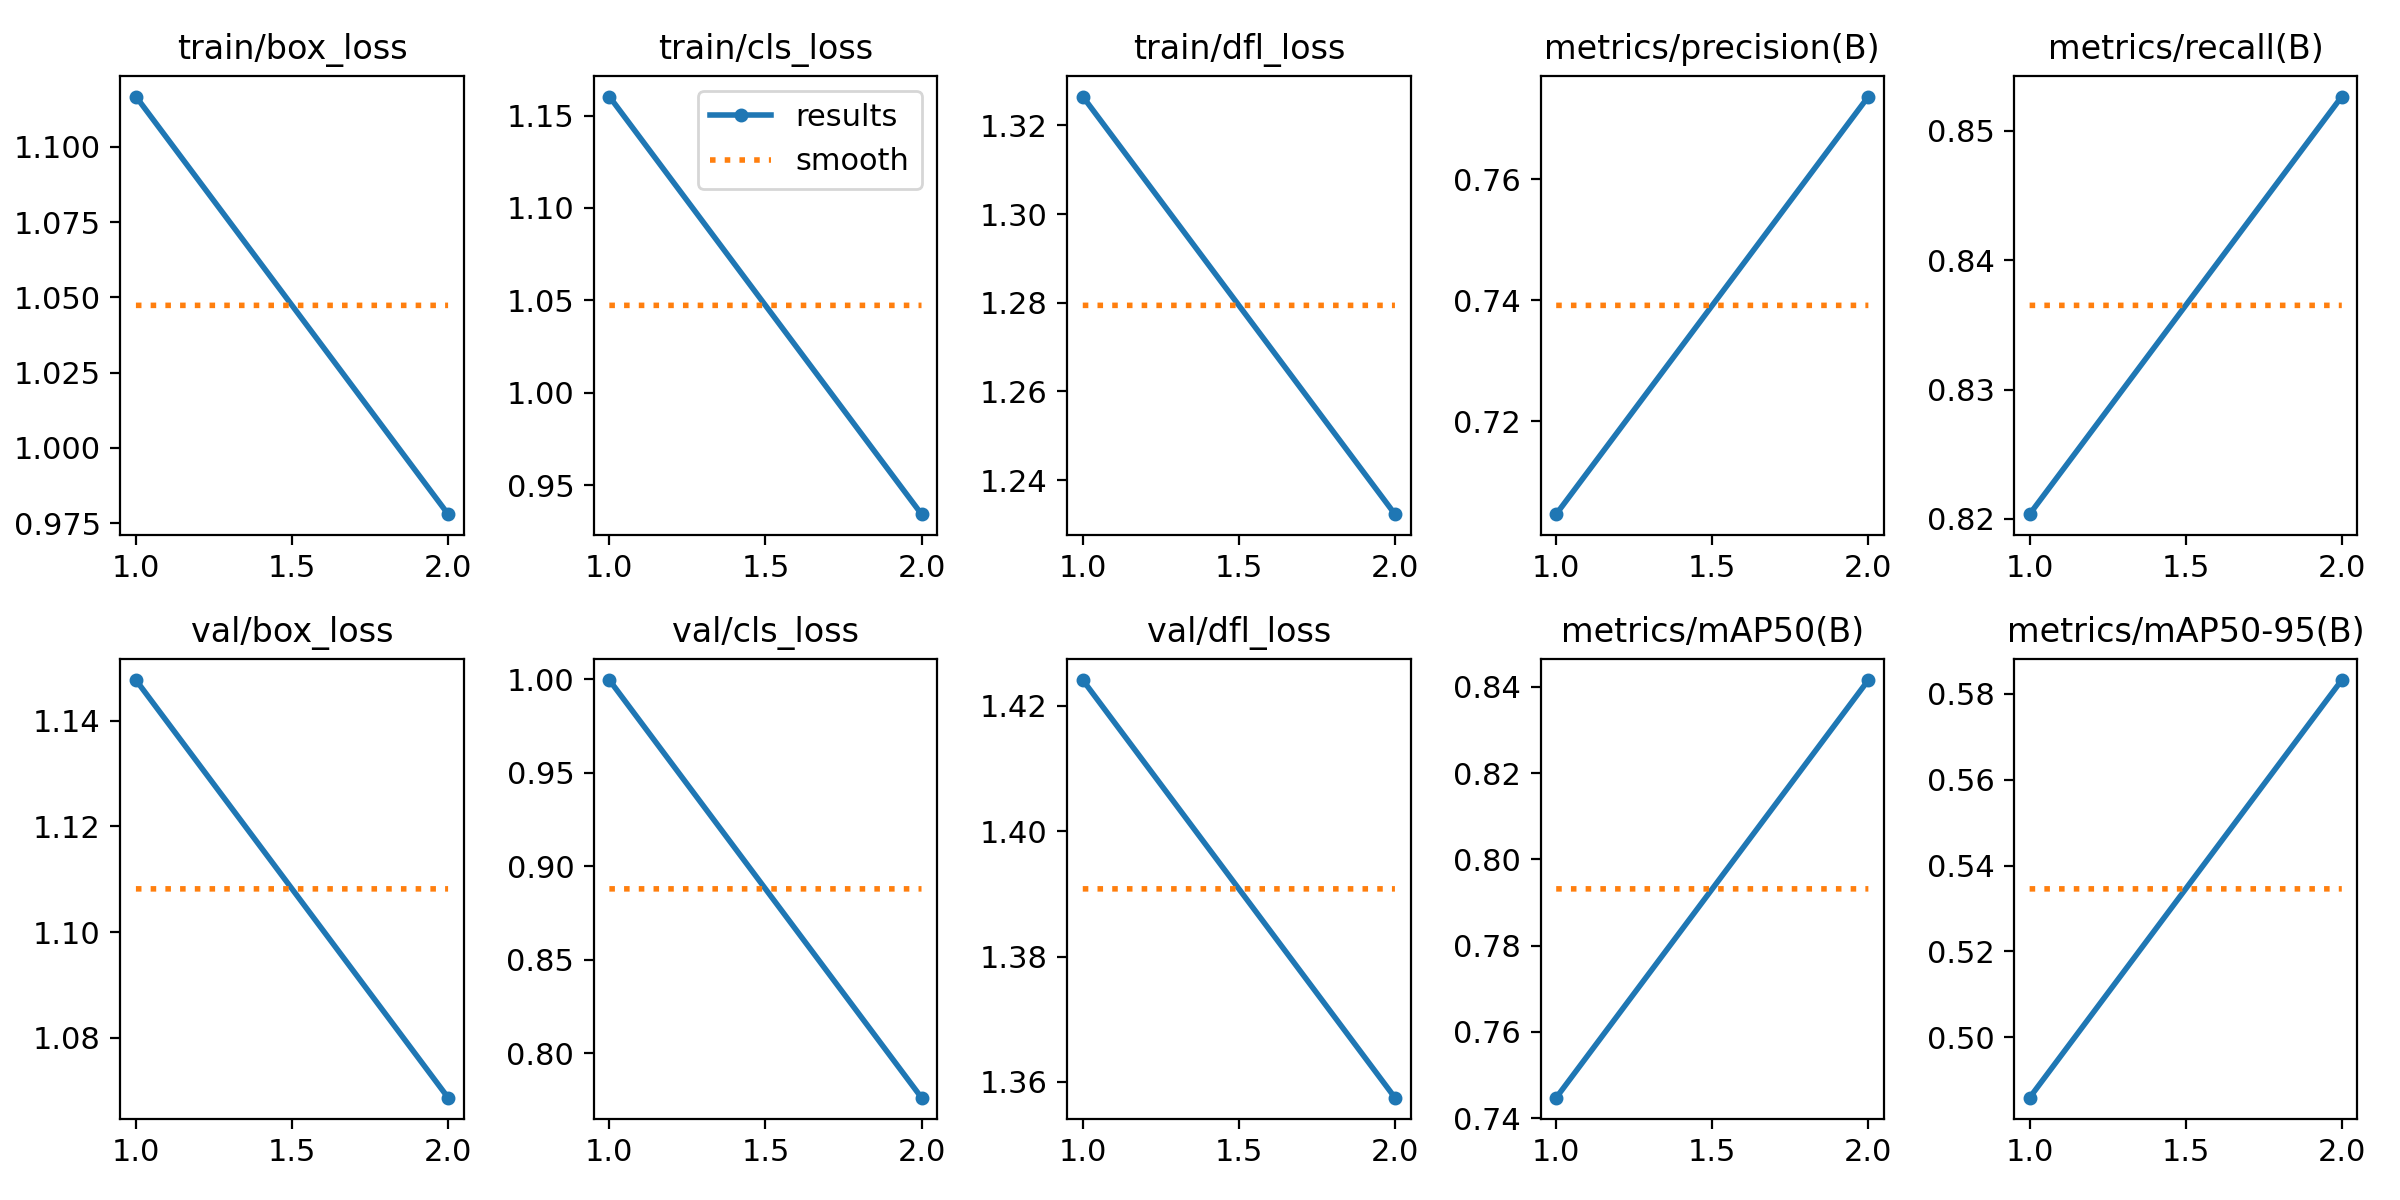

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


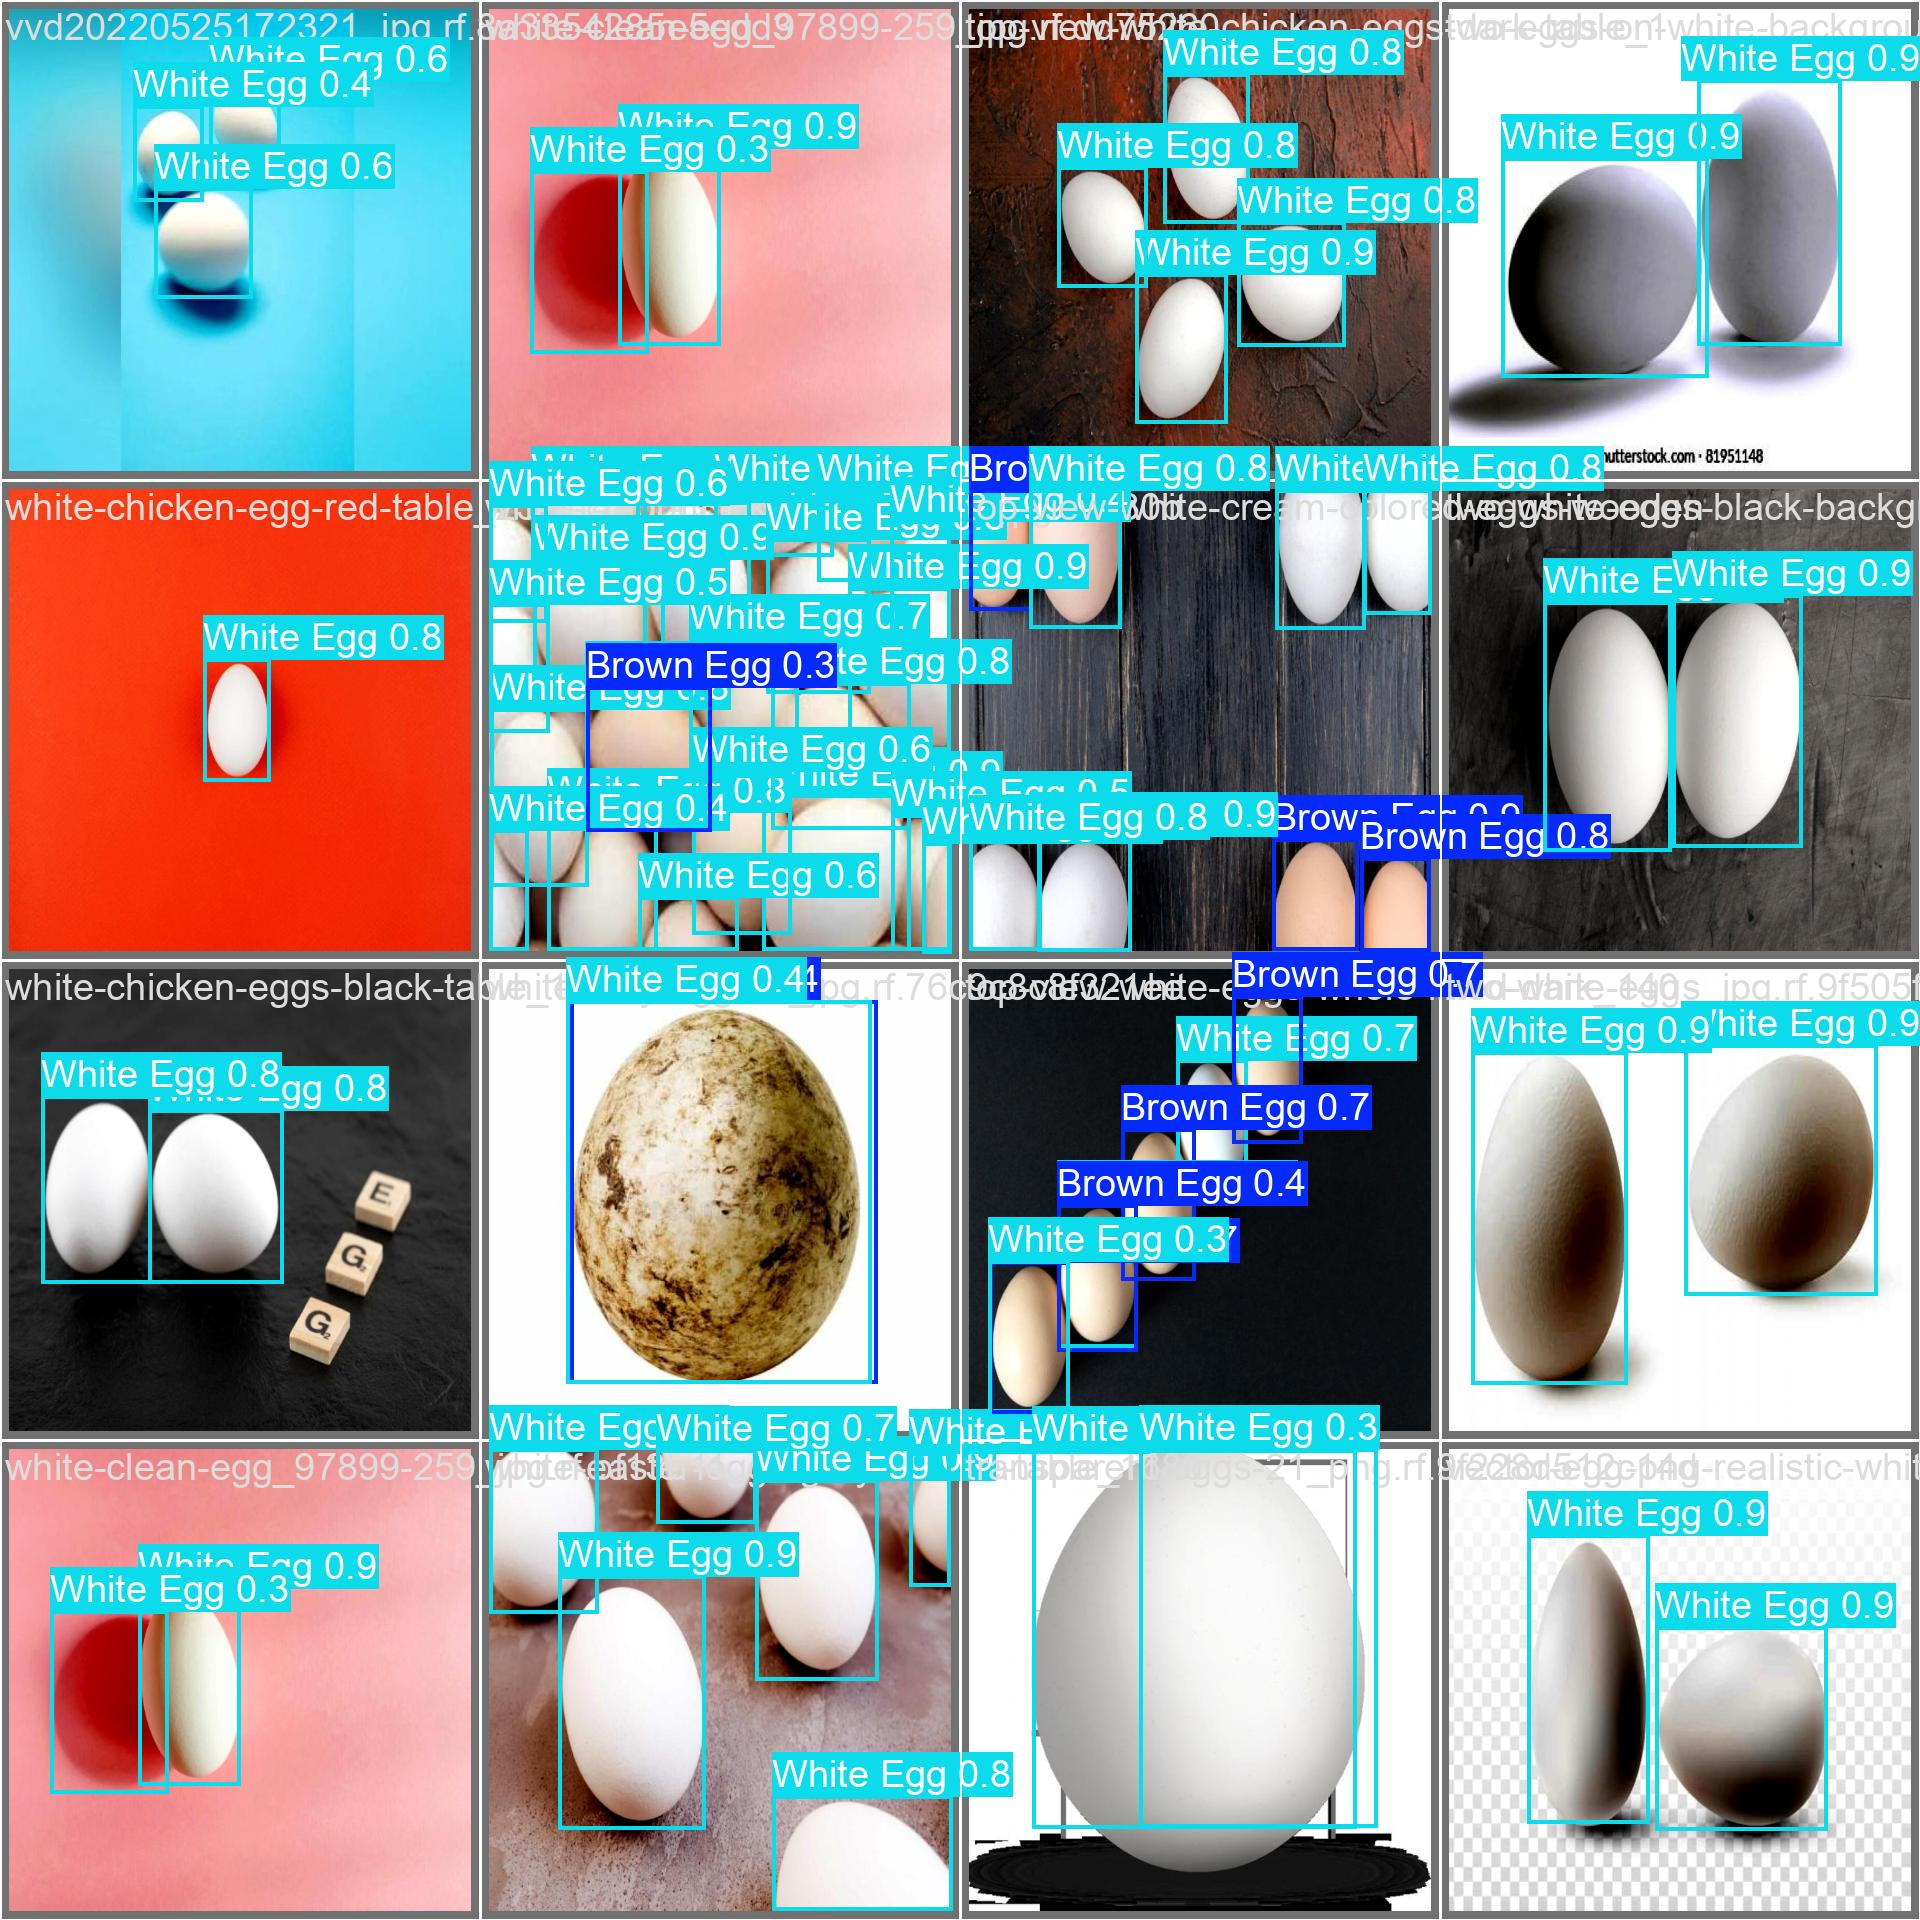

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [11]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/-Egg-Segmentation-in-Poultry-Industry-Based-on-Color-2/valid/labels.cache... 1416 images, 80 backgrounds, 0 corrupt: 100% 1416/1416 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 89/89 [00:27<00:00,  3.26it/s]
                   all       1416       6761      0.774      0.853      0.842      0.583
             Brown Egg        943       5064      0.845      0.872      0.907      0.652
             White Egg        554       1697      0.702      0.834      0.776      0.514
Speed: 0.7ms preprocess, 12.7ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [12]:
!zip -r weights.zip runs/detect/train/weights


  adding: runs/detect/train/weights/ (stored 0%)
  adding: runs/detect/train/weights/last.pt (deflated 8%)
  adding: runs/detect/train/weights/best.pt (deflated 8%)


## Inference with Custom Model

In [13]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

image 1/736 /content/datasets/-Egg-Segmentation-in-Poultry-Industry-Based-on-Color-2/test/images/0006986b21ac4d1958ff7162e3831842_jpg.rf.fb9535975dd788f0e375aa8e3c94b010.jpg: 800x800 5 Brown Eggs, 23.0ms
image 2/736 /content/datasets/-Egg-Segmentation-in-Poultry-Industry-Based-on-Color-2/test/images/1024px-Chicken_egg_png.rf.4b6c397427324e1ff28c230309cff82b.jpg: 800x800 1 Brown Egg, 1 White Egg, 22.9ms
image 3/736 /content/datasets/-Egg-Segmentation-in-Poultry-Industry-Based-on-Color-2/test/images/111-10-_jpg.rf.c7d3908fc3049e8761158a1a2d5a7bbb.jpg: 800x800 2 White Eggs, 22.9ms
image 4/736 /content/datasets/-Egg-Segmentation-in-Poultry-Industry-Based-on-Color-2/test/images/111-13-_jpg.rf.d72209a8775578a40099cefbc2e04658.jpg: 800x800 1 Brown Egg, 2 White Eggs, 22.9ms
image 5/736 /content/datasets/-Egg-Segment

**NOTE:** Let's take a look at few results.

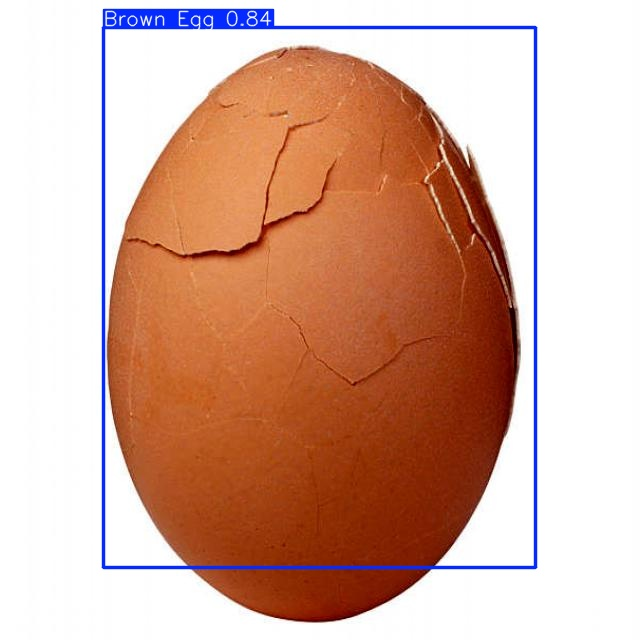

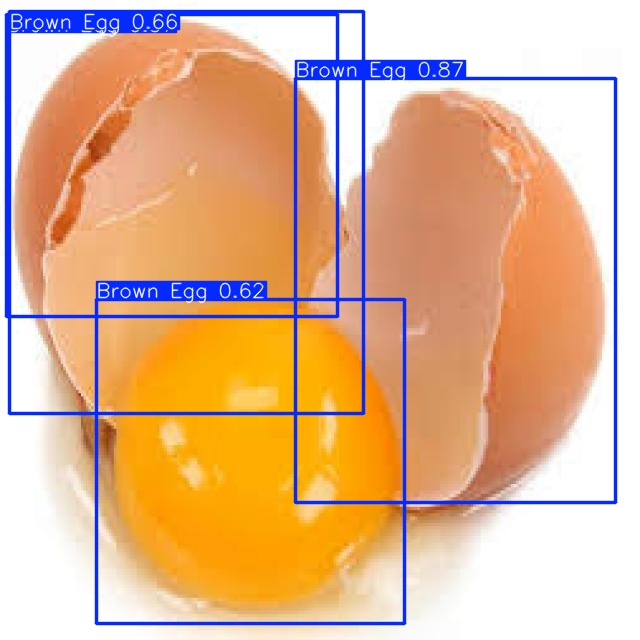

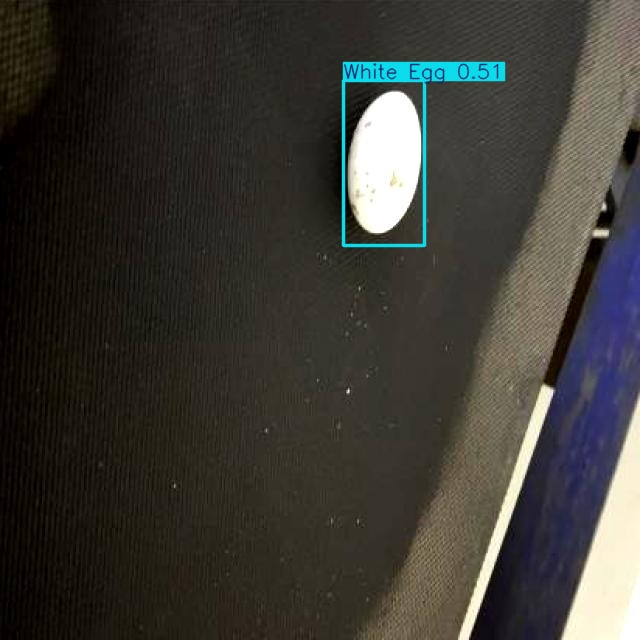

In [14]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [15]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

Dependency ultralytics==8.0.196 is required but found version=8.2.103, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
An error occured when getting the model upload URL: 404 Client Error: Not Found for url: https://api.roboflow.com/data-science-w0gxs/egg-segmentation-in-poultry-industry-based-on-color-4kum1/2/uploadModel?api_key=Igh6llT273zCj6FMMsqB&modelType=yolov8&nocache=true


Follow the links above to check if the upload succeeded. It may take a couple of minutes until the model is visible to the `roboflow` SDK.

In [16]:
# Run inference on your model on a persistent, auto-scaling, cloud API

# Load model
model = project.version(dataset.version).model
assert model, "Model deployment is still loading"

# Choose a random test image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on images-123-_jpg.rf.c2cea4e128fce0add17422d99aee1d03.jpg


{'predictions': [{'x': 518.5,
   'y': 408.0,
   'width': 173.0,
   'height': 274.0,
   'confidence': 0.9072116017341614,
   'class': 'Brown Egg',
   'class_id': 0,
   'detection_id': '65015b27-9f87-48e1-83b3-45e87a2bf2e0',
   'image_path': '/content/datasets/-Egg-Segmentation-in-Poultry-Industry-Based-on-Color-2/test/images/images-123-_jpg.rf.c2cea4e128fce0add17422d99aee1d03.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 353.0,
   'y': 278.0,
   'width': 180.0,
   'height': 254.0,
   'confidence': 0.9047791957855225,
   'class': 'Brown Egg',
   'class_id': 0,
   'detection_id': '6c863ba3-529e-46bb-9179-6d54911aa080',
   'image_path': '/content/datasets/-Egg-Segmentation-in-Poultry-Industry-Based-on-Color-2/test/images/images-123-_jpg.rf.c2cea4e128fce0add17422d99aee1d03.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 183.0,
   'y': 385.5,
   'width': 180.0,
   'height': 293.0,
   'confidence': 0.9019691944122314,
   'class': 'Brown Egg',
   'class_id': 0,
   '

# Deploy Your Model to the Edge

In addition to using the Roboflow hosted API for deployment, you can use [Roboflow Inference](https://inference.roboflow.com), an open source inference solution that has powered millions of API calls in production environments. Inference works with CPU and GPU, giving you immediate access to a range of devices, from the NVIDIA Jetson to TRT-compatible devices to ARM CPU devices.

With Roboflow Inference, you can self-host and deploy your model on-device. You can deploy applications using the [Inference Docker containers](https://inference.roboflow.com/quickstart/docker/) or the pip package.

For example, to install Inference on a device with an NVIDIA GPU, we can use:

```
docker pull roboflow/roboflow-inference-server-gpu
```

Then we can run inference via HTTP:

```python
import requests

workspace_id = ""
model_id = ""
image_url = ""
confidence = 0.75
api_key = ""

infer_payload = {
    "image": {
        "type": "url",
        "value": image_url,
    },
    "confidence": confidence,
    "iou_threshold": iou_thresh,
    "api_key": api_key,
}
res = requests.post(
    f"http://localhost:9001/{workspace_id}/{model_id}",
    json=infer_object_detection_payload,
)

predictions = res.json()
```

Above, set your Roboflow workspace ID, model ID, and API key.

- [Find your workspace and model ID](https://docs.roboflow.com/api-reference/workspace-and-project-ids?ref=blog.roboflow.com)
- [Find your API key](https://docs.roboflow.com/api-reference/authentication?ref=blog.roboflow.com#retrieve-an-api-key)

Also, set the URL of an image on which you want to run inference. This can be a local file.

_To use your YOLOv5 model commercially with Inference, you will need a Roboflow Enterprise license, through which you gain a pass-through license for using YOLOv5. An enterprise license also grants you access to features like advanced device management, multi-model containers, auto-batch inference, and more._

## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.